In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/id_label/result_for_All/merged_data_All.csv')
data = data.drop(columns=['Unnamed: 0'])

In [4]:
probe_id = pd.read_csv('../data/id_label/result_for_All/resultAll4.csv')

In [5]:
probe_id_with_name = probe_id[['gene_symbol','probe_id', 'r']]
probe_id_with_name = probe_id_with_name.astype({'probe_id': str})

In [6]:
positive_gene = probe_id_with_name.iloc[0]
negative_gene = probe_id_with_name.iloc[-1]

In [7]:
temp = data[['1030058', '1052936', 'EBM_Stage']]
temp = temp.melt(id_vars='EBM_Stage').rename(columns={'variable': 'Genes', 'value':'Expression'})
temp['Genes'] = temp['Genes'].map({'1030058':'KLK8', '1052936':'PRRX1'})

In [8]:
temp

,EBM_Stage,Genes,Expression
0,11,KLK8,1.957919
1,11,KLK8,2.621061
2,11,KLK8,2.104495
3,11,KLK8,1.605565
4,11,KLK8,1.944079
...,...,...,...
1147,15,PRRX1,4.362164
1148,15,PRRX1,4.077045
1149,15,PRRX1,3.689379
1150,15,PRRX1,4.374356


Text(0, 0.5, 'Expression')

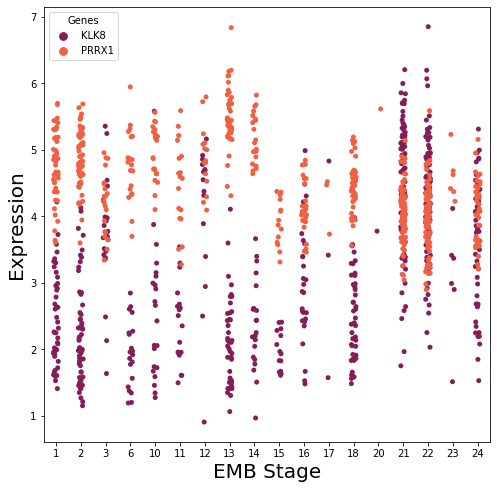

In [61]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(8, 8))
sns.stripplot(data=temp, x='EBM_Stage', y='Expression', hue='Genes', ax=ax, 
              palette=sns.color_palette("rocket", n_colors=2))
ax.set_xlabel('EBM Stage', fontsize=20)
ax.set_ylabel('Expression', fontsize=20)

In [9]:
temp

,EMB_Stage,Genes,Expression
0,11,KLK8,1.957919
1,11,KLK8,2.621061
2,11,KLK8,2.104495
3,11,KLK8,1.605565
4,11,KLK8,1.944079
...,...,...,...
1147,15,PRRX1,4.362164
1148,15,PRRX1,4.077045
1149,15,PRRX1,3.689379
1150,15,PRRX1,4.374356


Text(0.5, 1.0, 'KLK8')

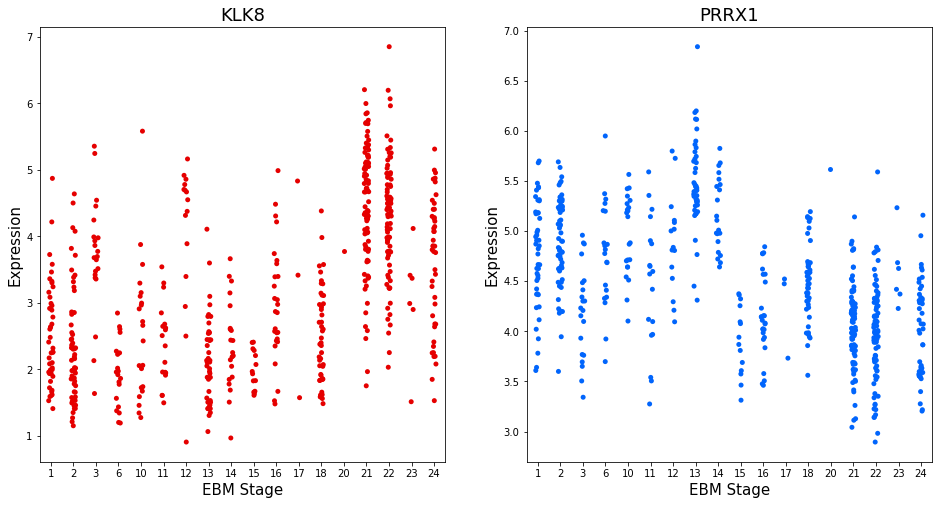

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
sns.stripplot(data=temp.loc[temp['Genes']=='PRRX1'], x='EBM_Stage', y='Expression', ax=ax2, color="xkcd:bright blue")
sns.stripplot(data=temp.loc[temp['Genes']=='KLK8'], x='EBM_Stage', y='Expression', ax=ax1, color="xkcd:red")
for ax in [ax1, ax2]:
    ax.set_xlabel('EBM Stage', fontsize=15)
    ax.set_ylabel('Expression', fontsize=15)
ax2.set_title('PRRX1', fontsize=18)
ax1.set_title('KLK8', fontsize=18)